<a href="https://colab.research.google.com/github/Yx121/Machine-Learning-Basic/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# The dataset contains 20640 samples. Each sample with 8 numeric, predictive attributes and the target value.
# The attributes are:

# MedInc: median income in block
# HouseAge: median house age in block
# AveRooms: average number of rooms
# AveBedrms: average number of bedrooms
# Population: block population
# AveOccup: average house occupancy
# Latitude: house block latitude
# Longitude: house block longitude

from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()

In [2]:
# Let us look at the feauture names:
feature_names = dataset['feature_names']
print("Feature names: {}\n".format(feature_names))

Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']



In [3]:
# Each line contains eight float values, which correspond to the features:
print("number of samples in the file (number of rows): ", dataset.data.shape[0])
print("number of features per row (columns): ", dataset.data.shape[1])
dataset.data[:4]

number of samples in the file (number of rows):  20640
number of features per row (columns):  8


array([[ 8.32520000e+00,  4.10000000e+01,  6.98412698e+00,
         1.02380952e+00,  3.22000000e+02,  2.55555556e+00,
         3.78800000e+01, -1.22230000e+02],
       [ 8.30140000e+00,  2.10000000e+01,  6.23813708e+00,
         9.71880492e-01,  2.40100000e+03,  2.10984183e+00,
         3.78600000e+01, -1.22220000e+02],
       [ 7.25740000e+00,  5.20000000e+01,  8.28813559e+00,
         1.07344633e+00,  4.96000000e+02,  2.80225989e+00,
         3.78500000e+01, -1.22240000e+02],
       [ 5.64310000e+00,  5.20000000e+01,  5.81735160e+00,
         1.07305936e+00,  5.58000000e+02,  2.54794521e+00,
         3.78500000e+01, -1.22250000e+02]])

In [4]:
# filter the data by looking at the blocks with an avarage age less than 10 years:
n = 10
dataset.data[dataset.data[:, 1] < n]

array([[   2.5625    ,    2.        ,    2.77192982, ...,    1.64912281,
          37.82      , -122.29      ],
       [   7.611     ,    5.        ,    6.85577631, ...,    2.73252391,
          37.72      , -122.24      ],
       [   7.0568    ,    5.        ,    7.0234375 , ...,    3.39453125,
          37.73      , -122.06      ],
       ...,
       [   3.4186    ,    6.        ,    5.66256158, ...,    3.15394089,
          38.53      , -121.99      ],
       [   2.0474    ,    5.        ,    4.37813212, ...,    2.13667426,
          39.15      , -121.59      ],
       [   3.        ,    5.        ,    6.06779661, ...,    2.86440678,
          39.13      , -121.32      ]])

In [5]:
# The target variable is the median house value for California districts:
dataset.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

**Visualizing the Data**

In [6]:
# turn data into a pandas DataFrane for better view
import pandas as pd
data_df = pd.DataFrame(dataset.data, columns=["MedInc", "HouseAge", "AveRooms", 
                   "AveBedrms", "Population", "AveOccup", 
                   "Latitude", "Longitude"])
data_df.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [7]:
# now insert the average house value to our DataFrame:
data_df.insert(loc=len(data_df.columns), column='AvePropVal', value=dataset.target.reshape(-1,1))
# the reshape here turn a (20640,) to (20640, 1)
data_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,AvePropVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [8]:
# There are blocks where the average number of rooms is more than a hundred
data_df[data_df.AveRooms>100]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,AvePropVal
1914,1.875,33.0,141.909091,25.636364,30.0,2.727273,38.91,-120.10,5.00001
1979,4.625,34.0,132.533333,34.066667,36.0,2.400000,38.80,-120.08,1.62500


we assume that the samples where the average number of rooms are larger than 11 must be rubbish. Those will be removed.

In [9]:
no_of_districts_b4_cleansing = len(data_df)
data_df = data_df[data_df.AveRooms < 12]

print(no_of_districts_b4_cleansing)
print()
print('number of removed samples: ', no_of_districts_b4_cleansing - len(data_df))
print()
data_df.head

20640

number of removed samples:  145



<bound method NDFrame.head of        MedInc  HouseAge  AveRooms  ...  Latitude  Longitude  AvePropVal
0      8.3252      41.0  6.984127  ...     37.88    -122.23       4.526
1      8.3014      21.0  6.238137  ...     37.86    -122.22       3.585
2      7.2574      52.0  8.288136  ...     37.85    -122.24       3.521
3      5.6431      52.0  5.817352  ...     37.85    -122.25       3.413
4      3.8462      52.0  6.281853  ...     37.85    -122.25       3.422
...       ...       ...       ...  ...       ...        ...         ...
20635  1.5603      25.0  5.045455  ...     39.48    -121.09       0.781
20636  2.5568      18.0  6.114035  ...     39.49    -121.21       0.771
20637  1.7000      17.0  5.205543  ...     39.43    -121.22       0.923
20638  1.8672      18.0  5.329513  ...     39.43    -121.32       0.847
20639  2.3886      16.0  5.254717  ...     39.37    -121.24       0.894

[20495 rows x 9 columns]>

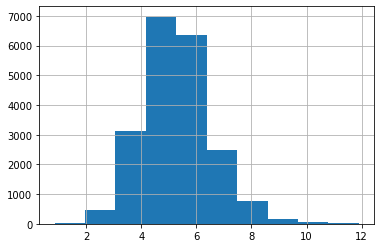

In [10]:
# historgram of cleansed data
data_df.AveRooms.hist()

similar reasoning for the number of people living in a house. Check the number of districts, where the AveOccup is greater than 13:

In [11]:
data_df[data_df.AveOccup > 13]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,AvePropVal
1039,4.3029,16.0,6.090592,1.121951,4930.0,17.177700,38.42,-120.97,1.21900
3364,5.5179,36.0,5.142857,1.142857,4198.0,599.714286,40.41,-120.51,0.67500
4479,3.5769,41.0,4.940000,1.100000,925.0,18.500000,34.07,-118.16,1.35700
5986,1.8750,52.0,4.500000,1.206349,2688.0,21.333333,34.10,-117.71,2.12500
7164,2.1845,36.0,4.812155,1.110497,2862.0,15.812155,34.06,-118.17,1.23800
8874,9.3370,52.0,7.285714,1.214286,1154.0,41.214286,34.06,-118.45,5.00001
9172,4.2391,5.0,5.123810,0.933333,8733.0,83.171429,34.47,-118.59,1.54600
12104,1.6250,8.0,7.600000,0.950000,1275.0,63.750000,33.97,-117.33,1.62500
13034,6.1359,52.0,8.275862,1.517241,6675.0,230.172414,38.69,-121.15,2.25000
13366,4.2578,36.0,5.258824,1.117647,2886.0,33.952941,33.94,-117.63,1.83300


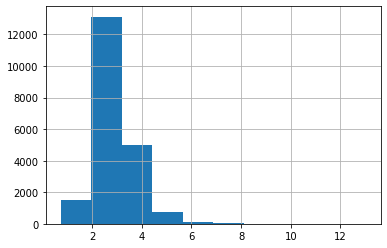

In [12]:
data_df.AveOccup[data_df['AveOccup']<=13].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe9f8109950>,
      dtype=object)

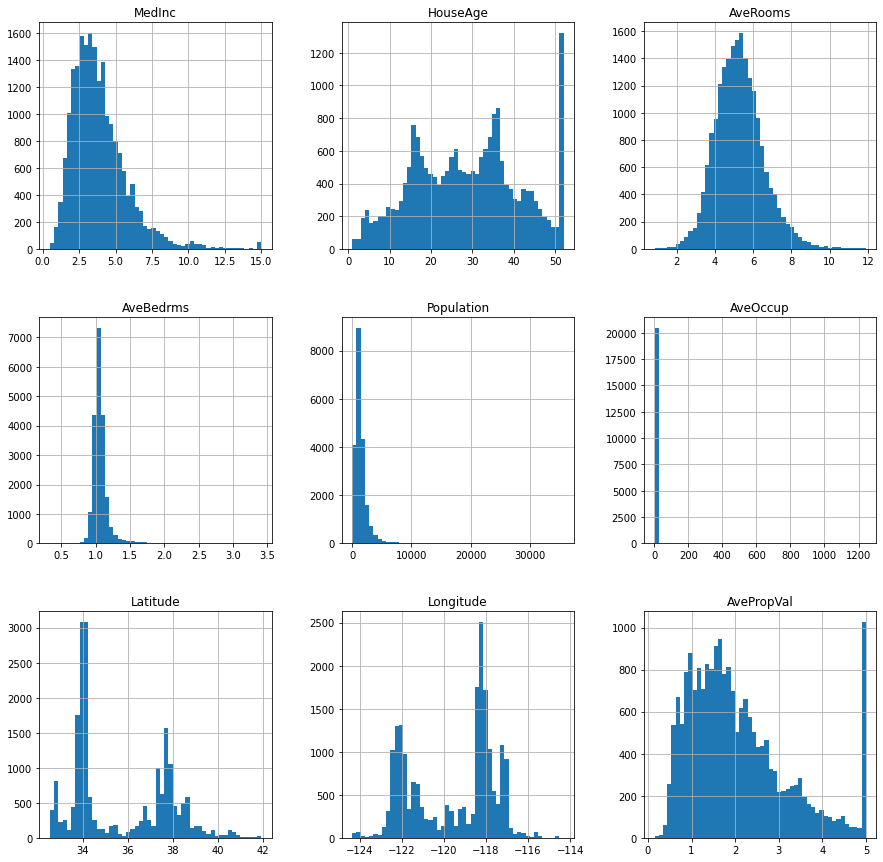

In [13]:
# check histograms for all features
data_df.hist(bins=50, figsize=(15,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe9f787ba90>,
      dtype=object)

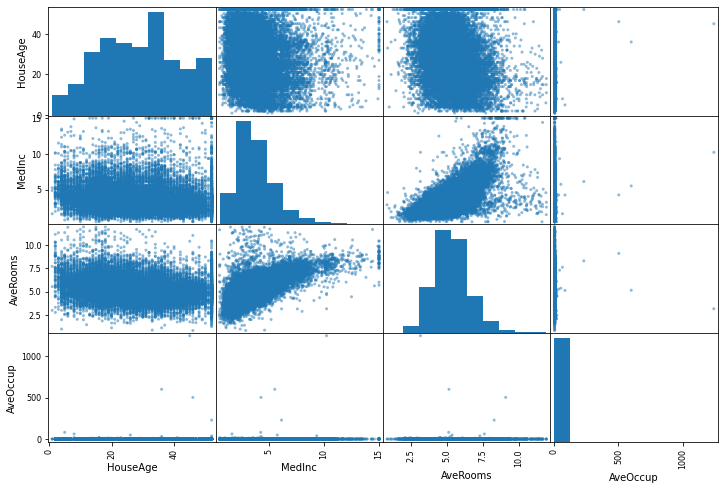

In [14]:
from pandas.plotting import scatter_matrix
attributes = ['HouseAge', 'MedInc', 'AveRooms', 'AveOccup']
scatter_matrix(data_df[attributes], figsize=(12, 8))

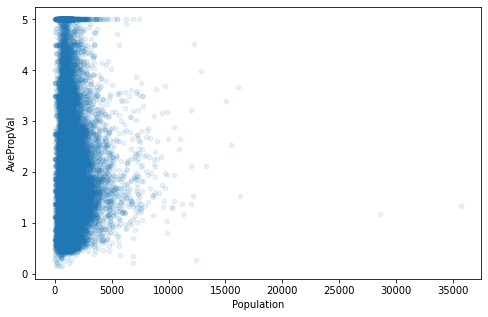

In [15]:
data_df.plot(kind='scatter', x='Population', y='AvePropVal', alpha=0.1, figsize=(8,5))

**Split the data**

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test  = train_test_split(dataset.data, dataset.target, test_size=0.30, random_state=42)

In [17]:
# fist classifier
from sklearn.neural_network import MLPRegressor
clf = MLPRegressor(solver='lbfgs',        #  ‘lbfgs’, ‘sgd’, ‘adam’ (default)
                   alpha=1e-5,            # used for regularization, ovoiding overfitting by penalizing large magnitudes
                   hidden_layer_sizes=(10, 2), 
                   activation='logistic', # ‘identity’, ‘logistic’, ‘tanh’, ‘relu’ (default)
                   max_iter=10000,
                   random_state=42)
clf.fit(x_train, y_train)
clf.predict(x_train)

array([1.9822852 , 1.97020516, 2.10175362, ..., 1.69565848, 2.31984707,
       2.61633106])


Parameters:

1. activation{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’ Activation function for the hidden layer.
* ‘identity’, no-op activation, useful to implement linear bottleneck, returns f(x) = x
* ‘logistic’, the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x))
* ‘tanh’, the hyperbolic tan function, returns f(x) = tanh(x).
* ‘relu’, the rectified linear unit function, returns f(x) = max(0, x)

2. solver{‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’ The solver for weight optimization.
* ‘lbfgs’ is an optimizer in the family of quasi-Newton methods.
* ‘sgd’ refers to stochastic gradient descent.
* ‘adam’ refers to a stochastic gradient-based optimizer.

Note: The default solver ‘adam’ works pretty well on relatively large datasets (with thousands of training samples or more) in terms of both training time and validation score. For small datasets, however, ‘lbfgs’ can converge faster and perform better.

# Data Preprocessing

In [18]:
# remove outliers
max_ave_rooms = 12
# column with index 2 corresponds to average number of rooms
shape = dataset.data.shape
cleansed_shape = dataset.data[dataset.data[:,2] <= max_ave_rooms].shape
print(shape, cleansed_shape)
n_outliers = shape[0]-cleansed_shape[0]
print(f"Number of outliers, more than {max_ave_rooms} bedrooms: {n_outliers}")

(20640, 8) (20495, 8)
Number of outliers, more than 12 bedrooms: 145


In [19]:
# remove all data with an average number of rooms greater than max_ave_rooms:
x = dataset.data[:,2] <= max_ave_rooms  # Boolean array
data = dataset.data[x]
targets = dataset.target[x]
data.shape, targets.shape

((20495, 8), (20495,))

In [20]:
# look at the statistics for each feature:
data_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,AvePropVal
count,20495.000000,20495.000000,20495.000000,20495.000000,20495.000000,20495.000000,20495.000000,20495.000000,20495.000000
mean,3.870574,28.715540,5.297038,1.069902,1432.511979,3.074511,35.621918,-119.573349,2.071016
std,1.898052,12.575564,1.274305,0.143758,1132.726950,10.422249,2.130666,2.003646,1.154817
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.750000,32.540000,-124.350000,0.149990
25%,2.562500,18.000000,4.434997,1.005747,793.000000,2.432727,33.930000,-121.800000,1.198000
50%,3.534700,29.000000,5.219585,1.048128,1171.000000,2.823322,34.250000,-118.490000,1.801000
75%,4.744800,37.000000,6.027555,1.098000,1729.000000,3.285983,37.710000,-118.010000,2.652000
max,15.000100,52.000000,11.901869,3.411111,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [21]:
# remove all data with an average number of occup greater than 10:
x = data[:,5] <= 10   # AveOccup
data = data[x]
targets = targets[x]
data.shape, targets.shape

((20459, 8), (20459,))

In [22]:
# check average bedrooms
import numpy as np
np.min(data[:,3]), np.max(data[:,3])

# The outliers for this feature have already removed due to the previous cleaning actions.

(0.3333333333333333, 3.411111111111111)

In [23]:
# another try on classification
# cleaned data
x_train, x_test, y_train, y_test = train_test_split(data, targets, test_size=0.30, random_state=42)
# original data
x_train2, x_test2, y_train2, y_test2 = train_test_split(dataset.data, dataset.target, test_size=0.30, random_state=42)
print(data.shape)
print()
print(x_train.shape, x_train2.shape)

(20459, 8)

(14321, 8) (14448, 8)


In [24]:
clf = MLPRegressor(solver='lbfgs',        #  ‘lbfgs’, ‘sgd’, ‘adam’ (default)
                   alpha=1e-5,            # used for regularization, ovoiding overfitting by penalizing large magnitudes
                   hidden_layer_sizes=(10, 2), 
                   activation='logistic', # ‘identity’, ‘logistic’, ‘tanh’, ‘relu’ (default)
                   max_iter=10000,
                   random_state=42)
clf.fit(x_train, y_train)
print(clf.score(x_train, y_train))
print(clf.score(x_test, y_test))

0.6528592619664814
0.6420348600496


In [25]:
# uncleansed data gives us slightly worse results:
clf.fit(x_train2, y_train2)
print(clf.score(x_train2, y_train2))
print(clf.score(x_test2, y_test2))

0.6511809461046495
0.6445393231359735


**Scaling the data**

In [30]:
# As the data varies a lot in magnitude, we can or should scale the data:
from sklearn import preprocessing
data_scaled = preprocessing.scale(data)
data_scaled.shape

(20459, 8)

In [32]:
data_scaled[:5]

array([[ 2.35060892,  0.97741648,  1.32614432, -0.32120816, -0.98212191,
        -0.47819706,  1.06028422, -1.32627682],
       [ 2.33805042, -0.61364072,  0.73967535, -0.68360646,  0.86018141,
        -1.06008696,  1.05089666, -1.32128549],
       [ 1.78716513,  1.85249794,  2.35130642,  0.02519331, -0.82793203,
        -0.15611866,  1.04620287, -1.33126814],
       [ 0.93535084,  1.85249794,  0.40886977,  0.02249278, -0.7729908 ,
        -0.48813255,  1.04620287, -1.33625946],
       [-0.01281562,  1.85249794,  0.77404337,  0.07847414, -0.76678776,
        -0.96657835,  1.04620287, -1.33625946]])

In [27]:
data[:5]

array([[ 8.32520000e+00,  4.10000000e+01,  6.98412698e+00,
         1.02380952e+00,  3.22000000e+02,  2.55555556e+00,
         3.78800000e+01, -1.22230000e+02],
       [ 8.30140000e+00,  2.10000000e+01,  6.23813708e+00,
         9.71880492e-01,  2.40100000e+03,  2.10984183e+00,
         3.78600000e+01, -1.22220000e+02],
       [ 7.25740000e+00,  5.20000000e+01,  8.28813559e+00,
         1.07344633e+00,  4.96000000e+02,  2.80225989e+00,
         3.78500000e+01, -1.22240000e+02],
       [ 5.64310000e+00,  5.20000000e+01,  5.81735160e+00,
         1.07305936e+00,  5.58000000e+02,  2.54794521e+00,
         3.78500000e+01, -1.22250000e+02],
       [ 3.84620000e+00,  5.20000000e+01,  6.28185328e+00,
         1.08108108e+00,  5.65000000e+02,  2.18146718e+00,
         3.78500000e+01, -1.22250000e+02]])

**Generating Polynomial Features**

In [33]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

PolynomialFeatures does the following: Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree.

In [40]:
X = np.arange(6).reshape(3, 2)
print(X)
poly = PolynomialFeatures(degree=2)
poly.fit_transform(X)

[[0 1]
 [2 3]
 [4 5]]


array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [41]:
# If the interaction_only parameter is set to True, only interaction features are produced:
poly = PolynomialFeatures(interaction_only=True)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.],
       [ 1.,  2.,  3.,  6.],
       [ 1.,  4.,  5., 20.]])

In [42]:
# GET BACK TO OUR DATA:
pft = PolynomialFeatures(degree=2)
data_poly = pft.fit_transform(data_scaled)
data_poly

array([[ 1.        ,  2.35060892,  0.97741648, ...,  1.12420263,
        -1.40623038,  1.7590102 ],
       [ 1.        ,  2.33805042, -0.61364072, ...,  1.10438378,
        -1.38853451,  1.74579536],
       [ 1.        ,  1.78716513,  1.85249794, ...,  1.09454046,
        -1.39277656,  1.77227486],
       ...,
       [ 1.        , -1.14529647, -0.93185216, ...,  3.19630178,
        -1.46986232,  0.67593593],
       [ 1.        , -1.0570704 , -0.8522993 , ...,  3.19630178,
        -1.5590982 ,  0.7604999 ],
       [ 1.        , -0.78194435, -1.01140502, ...,  3.09639525,
        -1.46427431,  0.69245011]])

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_poly, targets, test_size=0.30, random_state=42)

In [44]:
clf.fit(x_train, y_train)
print(clf.score(x_train, y_train))
print(clf.score(x_test, y_test))

0.8400729072769798
0.7656347407520135


In [45]:
clf.predict(x_train)

array([2.75439798, 2.44334503, 1.99837558, ..., 2.34342763, 3.03897699,
       2.36477434])

In [46]:
y_train

array([2.109, 2.257, 1.508, ..., 3.1  , 2.825, 2.42 ])